URL: https://blog.csdn.net/qq_27114397/article/details/103920183

# 导入依赖

In [28]:
## TensorFlow is an open source machine learning library
## Note: The following line is temporary to use v2
#!pip install tensorflow==2.0.0-beta0
import tensorflow as tf
## Numpy is a math library
import numpy as np
## Matplotlib is a graphing library
import matplotlib.pyplot as plt
## math is Python's math library
import math

# 生成数据

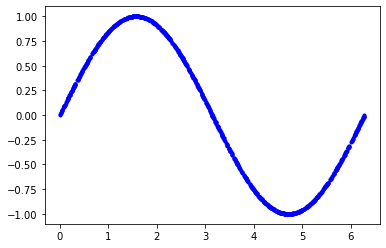

In [29]:
## We'll generate this many sample datapoints
SAMPLES = 1000

## Set a "seed" value, so we get the same random numbers each time we run this
## notebook
np.random.seed(1337)

## Generate a uniformly distributed set of random numbers in the range from
## 0 to 2π, which covers a complete sine wave oscillation
# 从一个均匀分布[low,high)中随机采样，注意定义域是左闭右开，即包含low，不包含high
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

## Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

## Calculate the corresponding sine values
y_values = np.sin(x_values)

## Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

# 添加噪声

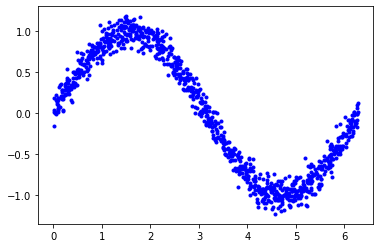

In [30]:
## Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

## Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

# 数据分割

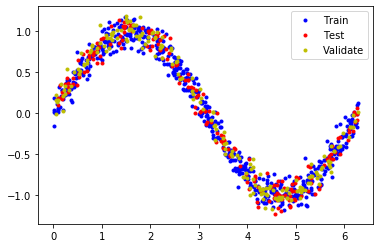

In [31]:
## We'll use 60% of our data for training and 20% for testing. The remaining 20%
## will be used for validation. Calculate the indices of each section.
## 60% 训练
## 20% 测试
## 20% 验证
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

## Use np.split to chop our data into three parts.
## The second argument to np.split is an array of indices where the data will be
## split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

## Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

## Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()

# 设计模型

In [32]:
## We'll use Keras to create a simple model architecture from tensorflow.keras import layers
model_1 = tf.keras.Sequential()

## First layer takes a scalar input and feeds it through 16 "neurons". The
## neurons decide whether to activate based on the 'relu' activation function.
model_1.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)))

## Final layer is a single neuron, since we want to output a single value
model_1.add(tf.keras.layers.Dense(1))

## Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model_1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


# 训练模型

In [33]:
## Train the model on our training data while validating on our validation set
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16, validation_data=(x_validate, y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/1000
600/600 [==============================] - 0s 294us/sample - loss: 2.1442 - mean_absolute_error: 1.3275 - val_loss: 0.9338 - val_mean_absolute_error: 0.8513
Epoch 2/1000
600/600 [==============================] - 0s 47us/sample - loss: 0.5415 - mean_absolute_error: 0.6049 - val_loss: 0.3624 - val_mean_absolute_error: 0.5032
Epoch 3/1000
600/600 [==============================] - 0s 45us/sample - loss: 0.2962 - mean_absolute_error: 0.4724 - val_loss: 0.3205 - val_mean_absolute_error: 0.4908
Epoch 4/1000
600/600 [==============================] - 0s 45us/sample - loss: 0.2638 - mean_absolute_error: 0.4491 - val_loss: 0.2895 - val_mean_absolute_error: 0.4763
Epoch 5/1000
600/600 [==============================] - 0s 43us/sample - loss: 0.2384 - mean_absolute_error: 0.4279 - val_loss: 0.2566 - val_mean_absolute_error: 0.4463
Epoch 6/1000
600/600 [==============================] - 0s 43us/sample - loss: 0.2170 - mean_absolute_error:

# 检查训练指标

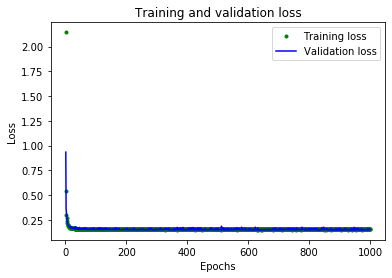

In [34]:
## Draw a graph of the loss, which is the distance between
## the predicted and actual values during training and validation.
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 查看数据

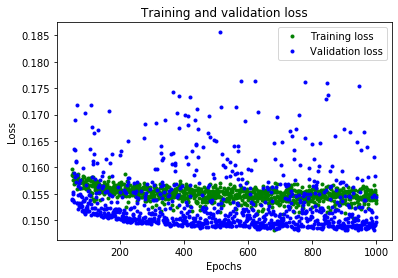

In [40]:
## Exclude the first few epochs so the graph is easier to read
SKIP = 50

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 进一步指标

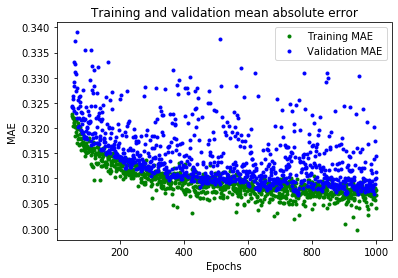

In [38]:
plt.clf()

## Draw a graph of mean absolute error, which is another way of
## measuring the amount of error in the prediction.
mae = history_1.history['mean_absolute_error']
val_mae = history_1.history['val_mean_absolute_error']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

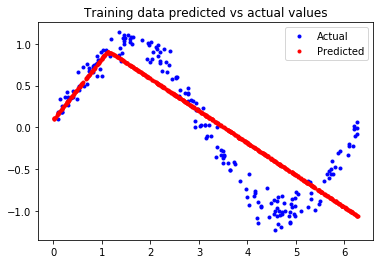

In [41]:
## Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)

## Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

# 修改模型

In [45]:
model_2 = tf.keras.Sequential()

## First layer takes a scalar input and feeds it through 16 "neurons". The
## neurons decide whether to activate based on the 'relu' activation function.
model_2.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)))

## The new second layer may help the network learn more complex representations
model_2.add(tf.keras.layers.Dense(16, activation='relu'))

## Final layer is a single neuron, since we want to output a single value
model_2.add(tf.keras.layers.Dense(1))

## Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [46]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16, validation_data=(x_validate, y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/600
600/600 [==============================] - 0s 371us/sample - loss: 0.4448 - mean_absolute_error: 0.5609 - val_loss: 0.4146 - val_mean_absolute_error: 0.5633
Epoch 2/600
600/600 [==============================] - 0s 52us/sample - loss: 0.3319 - mean_absolute_error: 0.5001 - val_loss: 0.3552 - val_mean_absolute_error: 0.5049
Epoch 3/600
600/600 [==============================] - 0s 52us/sample - loss: 0.2840 - mean_absolute_error: 0.4635 - val_loss: 0.2996 - val_mean_absolute_error: 0.4788
Epoch 4/600
600/600 [==============================] - 0s 50us/sample - loss: 0.2439 - mean_absolute_error: 0.4302 - val_loss: 0.2602 - val_mean_absolute_error: 0.4477
Epoch 5/600
600/600 [==============================] - 0s 52us/sample - loss: 0.2142 - mean_absolute_error: 0.4023 - val_loss: 0.2237 - val_mean_absolute_error: 0.4062
Epoch 6/600
600/600 [==============================] - 0s 50us/sample - loss: 0.1910 - mean_absolute_error: 0.377

# 评估新模型

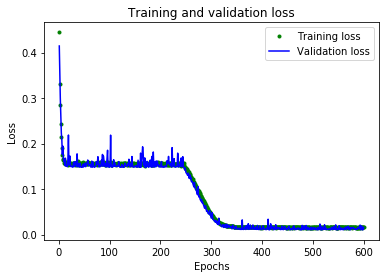

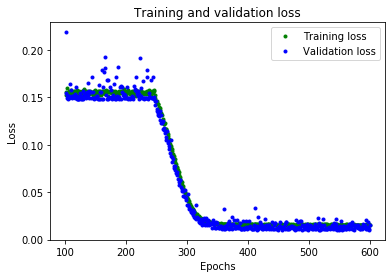

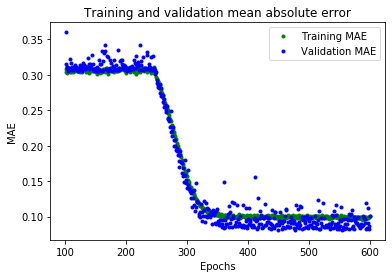

In [49]:
## Draw a graph of the loss, which is the distance between
## the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

## Draw a graph of mean absolute error, which is another way of
## measuring the amount of error in the prediction.
mae = history_2.history['mean_absolute_error']
val_mae = history_2.history['val_mean_absolute_error']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

200/200 [==============================] - 0s 215us/sample - loss: 0.0157 - mean_absolute_error: 0.1011


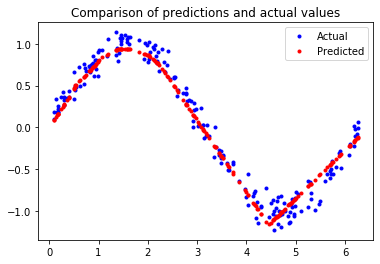

In [51]:
## Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)

## Make predictions based on our test dataset
predictions = model_2.predict(x_test)

## Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

# 转换为 TensorFlow Lite

In [52]:
## Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

## Save the model to disk
open("sine_model.tflite", "wb").write(tflite_model)

## Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

## Save the model to disk
open("sine_model_quantized.tflite", "wb").write(tflite_model)

AttributeError: type object 'TFLiteConverter' has no attribute 'from_keras_model'

# 测试转换后的模型

In [53]:
## Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

## Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

## Get the input and output tensors so we can feed in values and get the results
sine_model_input = sine_model.tensor(sine_model.get_input_details()[0]["index"])
sine_model_output = sine_model.tensor(sine_model.get_output_details()[0]["index"])
sine_model_quantized_input = sine_model_quantized.tensor(sine_model_quantized.get_input_details()[0]["index"])
sine_model_quantized_output = sine_model_quantized.tensor(sine_model_quantized.get_output_details()[0]["index"])

## Create arrays to store the results
sine_model_predictions = np.empty(x_test.size)
sine_model_quantized_predictions = np.empty(x_test.size)

## Run each model's interpreter for each value and store the results in arrays
for i in range(x_test.size):
  sine_model_input().fill(x_test[i])
  sine_model.invoke()
  sine_model_predictions[i] = sine_model_output()[0]

  sine_model_quantized_input().fill(x_test[i])
  sine_model_quantized.invoke()
  sine_model_quantized_predictions[i] = sine_model_quantized_output()[0]

## See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label='Lite quantized predictions')
plt.legend()
plt.show()

ValueError: Could not open 'sine_model.tflite'.